# 머신러닝을 위한 데이터 처리 절차
## 1. 데이터 수집
정형, 비정형, 반정형 데이터 


## 2. 통계적 데이터 탐색
## 3. 시각적 데이터 탐색
## 4. 데이터 전처리
## 5. 탐색적 데이터 분석과 상관분석
## 6. 머신러닝 알고리즘 선정
## 7. 머신러닝 수행 

# 데이터

In [ ]:
데이터는 수치형과 범주형으로 구분

## 수치형

수치형은 연속형, 이산형으로 구분
수치형 데이터는 값을 예측(회귀모델)
회귀: regression
주식, 기온, 집값, ...

### 연속형

실수 : 1.15, 1.17, 1.19, 1.21
키, 몸무게, 백분율, 강수량, 온도, ...

### 이산형

In [ ]:
정수 : 1, 2, 3, 4
자녀수, 관객수, 개수, ...

## 범주형

In [ ]:
범주형은 명목형, 순서형으로 구분 

In [ ]:
범주형(숫자로 표현), 질적인 데이터, 분류 
분류: classification
혈액형, ...
숫자로 나타내지만 크기는 상관없이 분류를 뜻한다.


In [ ]:
명목형 - 특성분류
성별, 혈액형, ...


In [ ]:
순서형
학점 A, B, C, D, F => 1, 2, 3, 4, 5
값이 크다고 좋은 것은 아니다, 서열이 존재하고 사칙연산의 의미가 없다.




## 기술통계량

In [ ]:
중심경향 : 평균, 중앙, 최빈 / 데이터들의 중심을 표현하기 위한 값 / 이상치 제외
산포도 : 데이터의 퍼짐 정도 / 


In [ ]:
정규분포 : 최빈 = 평균 = 중앙값, 가장 이상적 
아웃라이어 : 제외시킬 데이터, 평균은 아웃라이어 선정에 가장 취약한 값이다.
정적편포 : 앞쪽이 많은
부적편포 : 뒷쪽이 많은

In [ ]:
평균 : 산술평균, 기하평균, 조화평균 


In [ ]:
## 평균

### 산술평균(Arithmetic mean)
모든 데이터의 합 / 전체 개수

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/c03ccecb05cafe9c786f1b54d60eb5263bd296c1"/>

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b8b33202ff2ea533521f74607a900866c5a98e6a"/>

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df_tip = sns.load_dataset('tips')
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [50]:
df_tip['total_bill'].mean()

19.78594262295082

In [52]:
np.mean(df_tip['total_bill'])

19.78594262295082

## 기하평균(Geometric mean)
n개의 양수 값을 모두 곱한 것의 n제곱근   
다기간의 수익률에 대한 평균 수익률, 평균 물가 상승률

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1f393c64bdc64328348f1a5ea9b54cef8edf09c1" alt='기하평균 수식'/>

In [92]:
pA = [240,260,270,290,360] #  A라는 상품의 판매갯수
pB = [11,21,31,41] #  B라는 상품의 판매갯수

In [108]:
#  연평균 성장률 (end / start)^(1/전체개수)
def geometricMean(x):
    return (x[-1] / x[0]) ** (1 / len(x)) - 1

In [110]:
a = geometricMean(pA)
print(a)

0.08447177119769855


## 조화평균(Harmonic mean)
각 요소의 역수의 산술 평균을 구해 다시 역수를 구한다.   
평균적인 변화율을 구할 때에 주로 사용한다.   

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/546f6b86031f811c87b850aed224071d0994d62f"/>

In [ ]:
## 산술, 기하, 조화평균의 관계 

산술(A) a+b/2
기하(G) √a+b
조화(H) 2ab/a+b = G^2/A

In [ ]:
## 분류의 성능을 측정 
precision(정확도, 정밀도)
recall(재현률)
F1-score(precision과 recall의 조화평균)

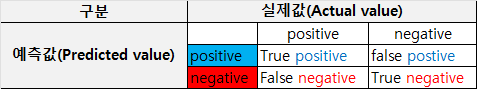

In [ ]:
전체 100개 
실제값 p 90, n 10
예측값 p 93, n 7

### 정확도(Accuracy = Precision) 
모든 모델에서 사용   

Accuracy =  TP + TN / (TP + TN + FP + FN) = 실제 맞춘 갯수 합 / 전체 개수

### 정밀도(Precision)
분류 모델에서 사용

Precision = TP / (TP + FP)

### 재현률(Recall)
Recall = TP / TP + FN

### F1-score
precision과 recall의 조화평균  
F1-score = (2 * Precision * Recall) / (Precision + Recall)


## 중앙값(median)
전체 데이터를 오름차순으로 배열했을 때 중앙에 위치한 값 

## 최빈값(mode)
가장 많이 발생된 값 

In [138]:
a = [1,3,5,1,2,1,5,7,3,2,9,9,9,9]
sr = pd.Series(a)
sr.mode() 


0    9
dtype: int64

## 산포도 
데이터가 중심에서 얼마나 떨어져있는지를 측정하는 척도 

분산 = (평균값 - 요소값)^2의 평균 
분산이 클수록 평균으로 부터 많이 떨어진(흩어진) 상태 
표준편차 = 분산의 제곱근 = √분산
분산보다 표준편차값이 더 작다.

범위 : 최댓값과 최솟값의 차이 
사분위수 : 전체 데이터를 오름차순으로 정렬 후 4등분할한 영역 

## 분위수(Quantile)
사분위수, 십분위수, 백분위수

### 사분위수 범위(Inter Qunatile Range, IQR)
1사분위(25%) ~ 3사분위(75%)

### 사분위수 활용
이상치의 범위를 확인할 때 사용

### 이상치 계산
Q3 + (IQR * 1.5)
Q1 - (IQR * 1.5)

## 변수(Variable)
feature : 어떤 값에 원인이 되는 변수, 입력, 독립변수, 설명변수, 예측변수
target : 어떤 값에 결과가 되는 변수, 출력, 종속변수, 반응변수, 결과변수 



In [ ]:
feature는 n개의 샘플로 구성 
feature가 여러개 feature matrix = X
target vector = y
1:1로 매칭 



In [ ]:
지도학습 : 정답이 있음 (정답=label)
비지도학습 : 정답이 없음 

## 3. 시각적 데이터 탐색 

In [152]:
df_tip.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [162]:
desc = df_tip.describe(include='all')
desc

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [176]:
desc['total_bill']['std']

8.902411954856856

In [184]:
q1 = desc['total_bill']['25%']
q1

13.3475

In [188]:
q3 = desc['total_bill']['75%']
q1

13.3475

## 범주형 데이터 

### 범주형 데이터의 기술통계 
주로 빈도를 계산한다
value_counts()

In [197]:
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [199]:
df_tip['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [203]:
df_sex = pd.DataFrame(df_tip['sex'].value_counts())
df_sex

,count
sex,
Male,157
Female,87


sex는 male과 female로 나뉘어져있다.
male 1, female 2로 하면 머신러닝 시 비교를 하기 때문에
남자는 male 1, female 0
여자는 male 0, female 1로 변경한다
이러한 방식을 One Hot Encoding이라고 한다 

In [207]:
pd.DataFrame(df_tip['smoker'].value_counts())

,count
smoker,
No,151
Yes,93


In [211]:
pd.DataFrame(df_tip['day'].value_counts())

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [213]:
pd.DataFrame(df_tip['time'].value_counts())

,count
time,
Dinner,176
Lunch,68


In [ ]:
# 요일별 전체 요금, 팁의 합

In [219]:
df_tip.groupby(by='day', observed=True)[['total_bill', 'tip']].sum()

,total_bill,tip
day,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


In [223]:
# 흡연여부에 따라 전체금액, 팁 합계
df_tip.groupby(by='smoker', observed=True)[['total_bill', 'tip']].sum()

,total_bill,tip
smoker,,
Yes,1930.34,279.81
No,2897.43,451.77


In [225]:
# 성별에 따라 전체금액, 팁의 합계
df_tip.groupby(by='sex', observed=True)[['total_bill', 'tip']].sum()

,total_bill,tip
sex,,
Male,3256.82,485.07
Female,1570.95,246.51


In [227]:
# 요일별 전체금액, 팁, 인원수의 평균
df_tip.groupby(by='day', observed=True)[['total_bill', 'tip', 'size']].mean()

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


## 4. 탐색적데이터 분석 
EDA(Exploration Data Analysis)
데이터 내의 값 분포, 변수 간의 관계, null, NaN, na 와 같은 결측값(Missing Data) 존재 유무를 파악하는 과정

In [280]:
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [232]:
df_tip['total_bill'].head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

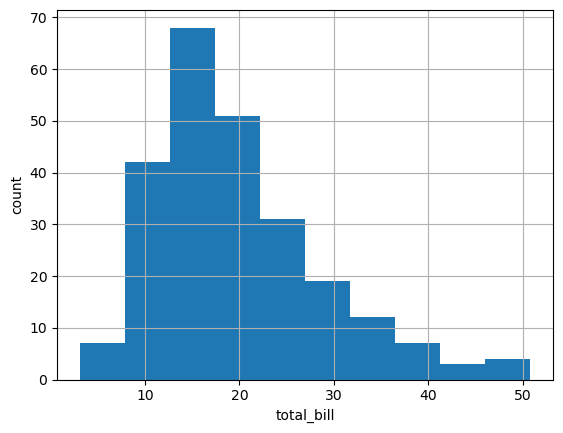

In [242]:
df_tip['total_bill'].plot(kind='hist')
plt.xlabel('total_bill')
plt.ylabel('count')
plt.grid()
plt.show()

<Figure size 500x500 with 0 Axes>

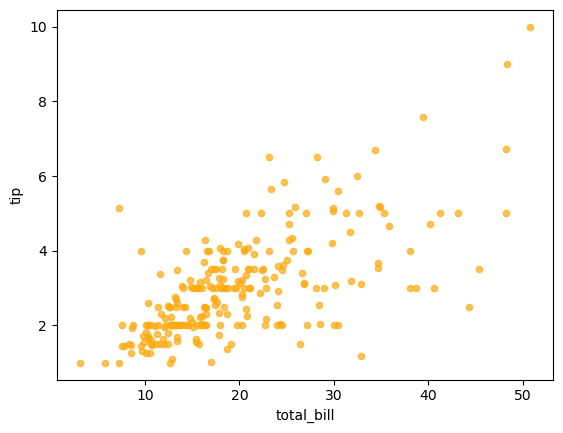

In [288]:
df_tip.plot(kind='scatter', x='total_bill', y='tip', color='#fa1', alpha=0.7)
plt.show()

<Axes: xlabel='day', ylabel='count'>

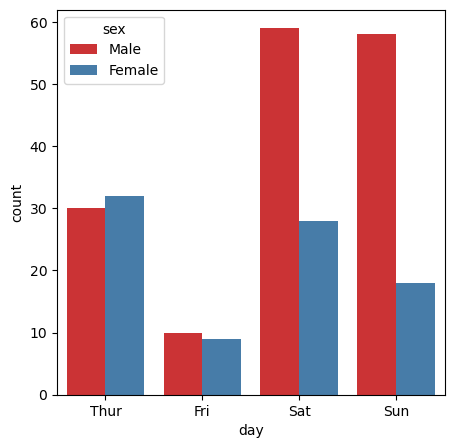

In [296]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_tip, x='day', hue='sex', palette=sns.color_palette('Set1', 2))


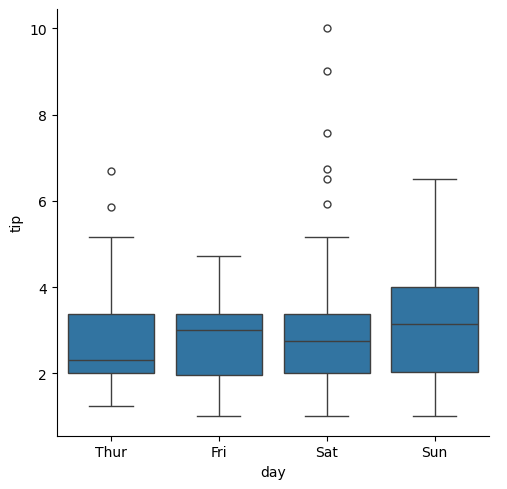

In [300]:
sns.catplot(data=df_tip, kind='box', x='day', y='tip')

In [ ]:
IQR, 1~3분위의 그래프 

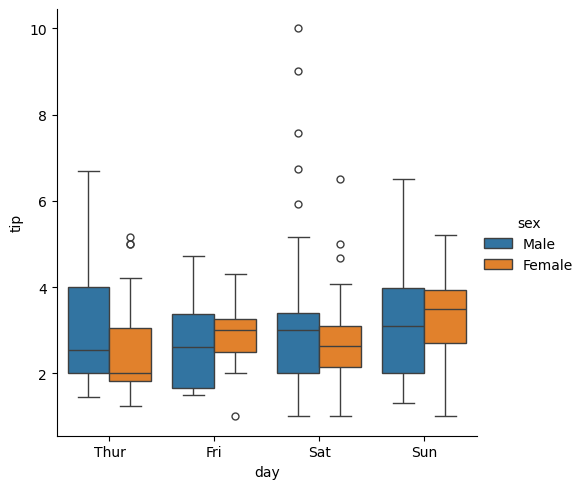

In [302]:
sns.catplot(data=df_tip, kind='box', x='day', y='tip', hue='sex')

## 4. 데이터 전처리 
데이터의 품질을 높이는 작업

데이터 분석을 위한 필수과정이며, 분석 결과 오류 방지 및 분석 결과 신뢰도 향상 시킬 수 있는 작업이다.

데이터 분석 및 처리에 적합한 형태로 만드는 과정을 일컫는다 

### 데이터 생애주기
원시데이터 -> 데이터 전처리 -> 원천데이터 -> 검증/레이블링 -> 레이블링 데이터


### 데이터 전처리 단계
데이터 정제 -> 데이터 통합 -> 데이터 변환 -> 데이터 축소

In [ ]:
### 1. 데이터 정제 
없는 데이터는 채우고, 잡음 데이터는 제거, 모순된 데이터는 올바르게 교정
NaN, null, na 값의 제거
누락값, 불일치, 오류 수정
컴퓨터로 처리할 수 없는 데이터 제거
날짜나 숫자 등의 형식을 일치 
모순데이터(남자의 주민등록 뒷자리가 2로 시작)

In [ ]:
### 2. 데이터 통합
출처가 다른 상호연관성이 있는 데이터들을 하나로 결합하는 과정 
표현단위가 다른 방식에 대한 통일
중복된 데이터를 검출 

In [ ]:
### 3. 데이터 변환
다양한 형식으로 수집된 데이터를 분석에 용이하도록 일관성 있는 데이터 형식으로 변환  
정규화(normalization) - 최대-최소 정규화, z-score정규화, 소수 스케일링 
평균화(평활화) : 잡음을 제거하기 위해 추세(데이터범위)를 벗어난 값을 변환 
속성생성 : 데이터 분포를 대표할 수 있는 컬럼을 생성 

In [ ]:
### 4. 데이터 축소
분석에 필요한 데이터를 축소, 고유한 특성은 손상되지 않도록 분석 효율성을 향상시키는 작업 
데이터 압축 : 데이터 인코딩, 데이터 변환을 통해 데이터 포맷을 변경 
차원 축소(PCA) : 특정 구간에 분포하는 값으로 스케일 변경 